# Bonner sphere mapping with the old target
# Spheres are reversed

- Code and data is in /Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_Plots
- Some report can already be found in /Users/hkromer/02_PhD/04_Publiations/04_Reports/05_BSMapping/2018-01-04_BS_Mapping.docx

In [1]:
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/'

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re
import copy

def extractDirection(df):
    if 'N' in df:
        return 'North'
    if 'S' in df:
        return 'South'
    if 'E' in df:
        return 'East'

def extractDistance(df):
    t = re.findall(r'(\d+)', df)
    return t[0]

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

## Read the data

- script to get all data from the database is already executed
- also some processing on the statistics has been done

- ctBS_mean is the countrate in the bonner sphere (in this case BS2) per second. Averaged over the measurement interval which was around 10-15 minutes.

- BS_norm_dose is the counts in the BS normed by the mean of the dose (measured with BS1), again in the respective measurement interval.

In [3]:
data_fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_df_resultswitchedspheres.csv'
df = pd.read_csv(data_fname, index_col=0)

df

,dose_mean,dose_err,refCt_mean,refCt_sum,refCt_time,refCt_err,ctWS_mean,ctWS_sum,ctWS_time,ctWS_err,...,ctBS_err,direction,distance,distance_err,BS_norm_dose,BS_norm_dose_err,BS_norm_refCt,BS_norm_refCt_err,BS_norm_WS,BS_norm_WS_err
run175N,415.386576,0.003354,863.835498,6921.0,7.0,0.012020,11.875000,2850.0,8.0,0.018732,...,0.008498,North,175,2,0.133656,0.000466,0.139691,0.000803,0.140228,0.091013
run55N,395.454545,0.004052,859.521212,4922.0,5.0,0.014254,11.861111,2135.0,6.0,0.021642,...,0.003677,North,55,2,1.000000,0.004211,1.000000,0.006815,1.000000,0.749854
run53E,416.541502,0.003612,863.454545,5930.0,6.0,0.012986,12.042857,2529.0,7.0,0.019885,...,0.004108,East,53,2,0.651887,0.002447,0.683520,0.004244,0.676286,0.465941
run185E,404.646465,0.002842,843.121212,9680.0,10.0,0.010164,12.069697,3983.0,11.0,0.015845,...,0.008928,East,185,2,0.090402,0.000268,0.094302,0.000458,0.090904,0.049912
run66S,424.379001,0.003326,893.978355,7132.0,7.0,0.011841,12.033333,2527.0,7.0,0.019893,...,0.004283,South,66,2,0.588539,0.002034,0.607242,0.003438,0.622546,0.429086
run197S,426.648575,0.002645,884.121212,11099.0,11.0,0.009492,12.712121,4195.0,11.0,0.015440,...,0.008628,South,197,2,0.091809,0.000253,0.096295,0.000437,0.092420,0.049444


In [4]:
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']

for df in [df_north, df_south, df_east]:
    df = df.sort_values(['distance'], ascending=True)

In [5]:
df_north

,dose_mean,dose_err,refCt_mean,refCt_sum,refCt_time,refCt_err,ctWS_mean,ctWS_sum,ctWS_time,ctWS_err,...,ctBS_err,direction,distance,distance_err,BS_norm_dose,BS_norm_dose_err,BS_norm_refCt,BS_norm_refCt_err,BS_norm_WS,BS_norm_WS_err
run175N,415.386576,0.003354,863.835498,6921.0,7.0,0.012020,11.875000,2850.0,8.0,0.018732,...,0.008498,North,175,2,0.133656,0.000466,0.139691,0.000803,0.140228,0.091013
run55N,395.454545,0.004052,859.521212,4922.0,5.0,0.014254,11.861111,2135.0,6.0,0.021642,...,0.003677,North,55,2,1.000000,0.004211,1.000000,0.006815,1.000000,0.749854


## Load the total counts in the LB6411 per source particle

- is stored in the MCNP data files: /Volumes/hkromer/10_Experiments/02_MCNP/
- a list of each mcnp run is in the notion card MCNP Run Overview

- in each MCNP run folder, the file "df_counts.csv" contains the total counts in the LB6411 per MCNP source particle. In this dataframe, the response of the LB6411 is already accounted for


In [6]:
"""
M_tot from MCNP: total counts in LB6411 per source particle

1. relative behaviour. Set M_tot(55 cm N) as the reference point and check the behaviour of the countrate for the other
directions.
"""

MCNP_data_fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/df_counts.csv'

df_mcnp = pd.read_csv(MCNP_data_fname, index_col=0)
M_tot = df_mcnp.iloc[-1]
M_tot = pd.DataFrame(M_tot)
# print(M_tot)
M_tot['direction'] = M_tot.index
M_tot['distance'] = M_tot.index

M_tot['direction'] = M_tot['direction'].map(extractDirection)
M_tot['distance'] = pd.to_numeric(M_tot['distance'].map(extractDistance))

lstDirection = ['North', 'South', 'East']


df_M_tot = pd.DataFrame()
d = np.arange(20, 240, 1)  # distance source to detector in cm

df_M_tot['distance'] = d

# interpolate M_tot values
M_tot = M_tot.reset_index()
# print(M_tot)
for dir in lstDirection:
    t = M_tot[['distance','Total']][M_tot['direction'] == dir]
    t.columns = ['distance', dir]
    df_M_tot = pd.merge(df_M_tot, t, how='left', on=['distance'])
    # df_res = pd.merge(df_res, df_ref, how='left', on=['date'])
    df_M_tot[dir] = df_M_tot[dir].interpolate(method='linear')
# print(df_M_tot.head(55))

# normalize with 55 cm N
M_55N = df_M_tot['North'][ df_M_tot['distance'] == 55 ]

for dir in lstDirection:
    df_M_tot[dir] = df_M_tot[dir].apply(lambda x: x / M_55N)

In df_M_tot the entries in the column North, South and East refer to the counts at this particular position (indicated by the column value in distance) in the LB6411 normed to the counts at the position 55 north.

The position 55 cm north is taken as an (arbitrary) reference.

In [7]:
df_M_tot.head()

,distance,North,South,East
0,20,6.082353,NaN,4.312042
1,21,5.890828,NaN,4.172509
2,22,5.699304,NaN,4.032977
3,23,5.507779,NaN,3.893444
4,24,5.316255,NaN,3.753911


## Relationship between North, South, West, East, and X, Y in the thesis.

- North is +x direction (forward)
- South is -x direction (backwards)
- East is +y direction (side)

## Plot to show the relationship between measured counts in the BS2 and what would be expected from MCNP model.

Data is relative to 55 cm in north position, because MCNP gives results per source particle.

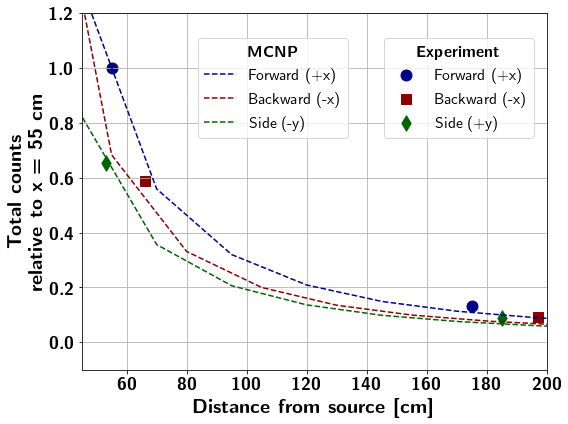

In [8]:
fs = 20
markersize = 120
figname = 'BS_mapping_old_target_reversedSpheres_counts_in_BS_vs_MCNP'
if not os.path.exists(outputfolder+'/'+figname):
    os.makedirs(outputfolder+'/'+figname)
    
# plots
normtypes = ['BS_norm_dose']
for normtype in normtypes:
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    
    # Plot of the expected MCNP counts
    ax1.plot(df_M_tot['distance'], df_M_tot['North'], '--', label=r"Forward (+x)", color='darkblue')
    ax1.plot(df_M_tot['distance'], df_M_tot['South'], '--', label=r"Backward (-x)", color='darkred')
    ax1.plot(df_M_tot['distance'], df_M_tot['East'], '--', label=r"Side (-y)", color='darkgreen')
    

    
#     _1 = ax1.scatter(df_north['distance'], df_north[normtype], label=r"Forward (+x)",  marker="o", color='darkblue', s=markersize)
    _1 = ax1.scatter(df_north['distance'], df_north[normtype],  marker="o", color='darkblue', s=markersize)
#     _2 = ax1.scatter(df_south['distance'], df_south[normtype], label=r"Backward (-x)",  marker="s", color='darkred', s=markersize)
    _2 = ax1.scatter(df_south['distance'], df_south[normtype],  marker="s", color='darkred', s=markersize)
#     _3 = ax1.scatter(df_east['distance'], df_east[normtype], label=r"Side (+y)",  marker="d", color='darkgreen', s=markersize)
    _3 = ax1.scatter(df_east['distance'], df_east[normtype], marker="d", color='darkgreen', s=markersize)

    my_handles, my_labels = ax1.get_legend_handles_labels()
    leg1 = plt.legend([my_handles[0], my_handles[1], my_handles[2]], [my_labels[0], my_labels[1], my_labels[2]], loc=(0.25, 0.65), markerscale=0, fontsize=fs-4)
    leg1.set_title(r"\textbf{MCNP}", prop = {'size': fs-4})

    leg2 = ax1.legend([_1,_2,_3],[r'Forward (+x)',r'Backward (-x)',r'Side (+y)'], loc=(0.65, 0.65), fontsize=fs-4)
    leg2.set_title(r"\textbf{Experiment}", prop = {'size': fs-4})
    # Manually add the first legend back
    ax1.add_artist(leg1)
#     ax1.errorbar(df_east['distance'], df_east[normtype], xerr=df_east['distance_err'], label=r"East\_exp",  ls='none', marker='s', color='olive', capsize=5)
    plt.xlabel(r"\textbf{Distance from source [cm]}", fontsize=fs)
    plt.ylabel(r"\textbf{Total counts}"+ "\n" + r"\textbf{relative to x = 55 cm}", fontsize=fs)
#     fig.suptitle(r"\textbf{Total counts expected and measured}")
#     ax1.set_title(r"\textit{Relative to 55 cm North}")
    ax1.grid(b=True, which='major', linestyle='-')
    ax1.grid(b=True, which='minor', linestyle='--')
#     fig.subplots_adjust(bottom=0.5)
#     plt.gcf().autofmt_xdate()
    plt.xlim(45,200)
    plt.ylim(-0.1,1.2)
    # tick font size
    ax1.tick_params('x', colors='black', labelsize=fs-2)	
    ax1.tick_params('y', colors='black', labelsize=fs-2)	
#     plt.legend(loc='best', title=r"\textbf{Legend}")
    plt.tight_layout()
    plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
    plt.show()
    plt.close()


# Table with the relative differences

- values are in percent

In [9]:
dict_dir = {'N': 'North', 'S': 'South', 'E': 'East', 'W': 'West'}
def getTheocounts(row):
    d = row['distance']
    direction = row.name[-1]
    dir_longname = dict_dir[direction]
    mcnp_counts = df_M_tot[ df_M_tot['distance'] == d ]
    return mcnp_counts[dir_longname].values[0]

ex = df[['distance', 'BS_norm_dose']]
ex['mcnp_counts'] = ex.apply(lambda x: getTheocounts(x), axis=1)
100*np.abs(ex['mcnp_counts']-ex['BS_norm_dose'])/ex['BS_norm_dose']

/Users/hkromer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


run53E      3.411071
run185E    25.379854
dtype: float64

## Comparison between output measured from BS1 (connected to the interlock) and BS2 (connected to the readout and moved around the room)

- original code is in /Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_compare_neutron_output_orig_and_switchedSpheres.py

In [10]:
fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/BS_mapping/2017-10-12_BS_Mapping/2017-10-12_df_neutron_output_from_BS2_switchedSpheres.csv'
df = pd.read_csv(fname, index_col=0)
df.head()

,dose_mean,dose_err,refCt_mean,refCt_sum,refCt_time,refCt_err,ctWS_mean,ctWS_sum,ctWS_time,ctWS_err,...,BS_norm_WS_err,total_neutron_output,expected_counts,perc_diff_expected_minus_meas_counts_BS2,M,total_neutron_output_from_BS2_cps,total_neutron_output_from_BS2_cps_norm_refCt,total_neutron_output_norm_refCt,total_neutron_output_from_BS2_cps_norm_ctWS,total_neutron_output_norm_ctWS
run175N,415.386576,0.003354,863.835498,6921.0,7.0,0.012020,11.875000,2850.0,8.0,0.018732,...,0.091013,6.649188e+06,48.747334,15.509784,0.000007,7.869773e+06,9110.267911,7697.284998,662717.710843,559931.622562
run55N,395.454545,0.004052,859.521212,4922.0,5.0,0.014254,11.861111,2135.0,6.0,0.021642,...,0.749854,6.330131e+06,425.110740,3.443058,0.000067,6.119436e+06,7119.586633,7364.718115,515924.324081,533687.896687
run53E,416.541502,0.003612,863.454545,5930.0,6.0,0.012986,12.042857,2529.0,7.0,0.019885,...,0.465941,6.667675e+06,301.858500,6.971574,0.000045,6.233128e+06,7218.825915,7722.091703,517578.841577,553662.233362
run185E,404.646465,0.002842,843.121212,9680.0,10.0,0.010164,12.069697,3983.0,11.0,0.015845,...,0.049912,6.477269e+06,29.343653,22.810639,0.000005,8.391401e+06,9952.780927,7682.488002,695245.352079,536655.444818
run66S,424.379001,0.003326,893.978355,7132.0,7.0,0.011841,12.033333,2527.0,7.0,0.019893,...,0.429086,6.793132e+06,240.789461,7.230655,0.000035,7.322604e+06,8191.030598,7598.765439,608526.653165,564526.190642


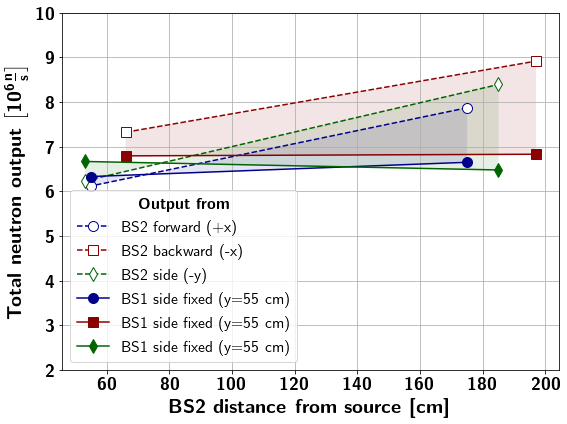

In [11]:
fs = 20
y_scale = 1e6
markersize = 10
figname = 'BS_mapping_old_target_reversedSpheres_output_BS2_vs_BS1_ALL'
if not os.path.exists(outputfolder+'/'+figname):
    os.makedirs(outputfolder+'/'+figname)
# plot neutron output
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']
df_south = df_south.sort_values(['distance'], ascending=True)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
# # x
# minor_locator = AutoMinorLocator(4)
# ax1.xaxis.set_minor_locator(minor_locator)
# # y
# minor_locator = AutoMinorLocator(2)
# ax1.yaxis.set_minor_locator(minor_locator)
ax1.plot(df_north['distance'], df_north['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 forward (+x)", marker="o", markersize=markersize, color='darkblue', markerfacecolor='white')
ax1.plot(df_south['distance'], df_south['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 backward (-x)", marker="s", markersize=markersize, color='darkred', markerfacecolor='white')
ax1.plot(df_east['distance'], df_east['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 side (-y)", marker='d', markersize=markersize, color='darkgreen', markerfacecolor='white')

ax1.plot(df_north['distance'], df_north['total_neutron_output']/y_scale,  label=r"BS1 side fixed (y=55 cm)", marker="o", markersize=markersize, color='darkblue')
ax1.plot(df_south['distance'], df_south['total_neutron_output']/y_scale, label=r"BS1 side fixed (y=55 cm)", marker="s", markersize=markersize, color='darkred')
ax1.plot(df_east['distance'], df_east['total_neutron_output']/y_scale, label=r"BS1 side fixed (y=55 cm)", marker='d', markersize=markersize, color='darkgreen')
# fig.subplots_adjust(left=0.14)
plt.xlabel(r'\textbf{BS2 distance from source [cm]}', fontsize=fs)
plt.ylabel(r'\textbf{Total neutron output} $\left[10^6 \frac{n}{s} \right]$', fontsize=fs)



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1e7))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
plt.ylim(2, 10)
# ticks
# y_ticks = np.arange(1.0e6, 10e6+1.0e6, 1.0e6)
# y = np.arange(1, 10+1, 1)
# plt.yticks(y_ticks, y)
ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# for tick in ax1.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
# for tick in ax1.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)

plt.gca().fill_between(df_north['distance'],
                       df_north['total_neutron_output_from_BS2_cps']/y_scale, df_north['total_neutron_output']/y_scale,
                       facecolor='darkblue',
                       alpha=0.1)
plt.gca().fill_between(df_south['distance'],
                       df_south['total_neutron_output_from_BS2_cps']/y_scale, df_south['total_neutron_output']/y_scale,
                       facecolor='darkred',
                       alpha=0.1)
plt.gca().fill_between(df_east['distance'],
                       df_east['total_neutron_output_from_BS2_cps']/y_scale, df_east['total_neutron_output']/y_scale,
                       facecolor='darkgreen',
                       alpha=0.1)
leg2 = plt.legend(fontsize=fs-4)
leg2.set_title(r"\textbf{Output from}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()
plt.close()

### North plot

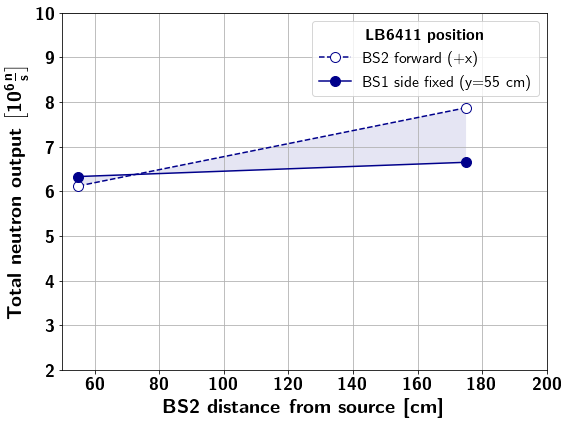

In [12]:
fs = 20
y_scale = 1e6
xlims = [50, 200]
figname = 'BS_mapping_old_target_reversedSpheres_output_BS2_vs_BS1_NORTH'
if not os.path.exists(outputfolder+'/'+figname):
    os.makedirs(outputfolder+'/'+figname)
# plot neutron output
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']
df_south = df_south.sort_values(['distance'], ascending=True)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
# # x
# minor_locator = AutoMinorLocator(4)
# ax1.xaxis.set_minor_locator(minor_locator)
# # y
# minor_locator = AutoMinorLocator(2)
# ax1.yaxis.set_minor_locator(minor_locator)
ax1.plot(df_north['distance'], df_north['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 forward (+x)", marker="o", markersize=markersize, color='darkblue', markerfacecolor='white')
# ax1.plot(df_south['distance'], df_south['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 South", marker="d", color='darkred', markerfacecolor='white')
# ax1.plot(df_east['distance'], df_east['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 East", marker='s', color='darkgreen', markerfacecolor='white')

ax1.plot(df_north['distance'], df_north['total_neutron_output']/y_scale,  label=r"BS1 side fixed (y=55 cm)", marker="o", markersize=markersize, color='darkblue')
# ax1.plot(df_south['distance'], df_south['total_neutron_output']/y_scale, label=r"BS1 55 cm West", marker="d", color='darkred')
# ax1.plot(df_east['distance'], df_east['total_neutron_output']/y_scale, label=r"BS1 55 cm West", marker='s', color='darkgreen')
# fig.subplots_adjust(left=0.14)
plt.xlabel(r'\textbf{BS2 distance from source [cm]}', fontsize=fs)
plt.ylabel(r'\textbf{Total neutron output} $\left[10^6 \frac{n}{s} \right]$', fontsize=fs)



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1e7))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
plt.ylim(2, 10)
plt.xlim(xlims)
# ticks
# y_ticks = np.arange(1.0e6, 10e6+1.0e6, 1.0e6)
# y = np.arange(1, 10+1, 1)
# plt.yticks(y_ticks, y)
ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# for tick in ax1.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
# for tick in ax1.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)

plt.gca().fill_between(df_north['distance'],
                       df_north['total_neutron_output_from_BS2_cps']/y_scale, df_north['total_neutron_output']/y_scale,
                       facecolor='darkblue',
                       alpha=0.1)
# plt.gca().fill_between(df_south['distance'],
#                        df_south['total_neutron_output_from_BS2_cps']/y_scale, df_south['total_neutron_output']/y_scale,
#                        facecolor='darkred',
#                        alpha=0.1)
# plt.gca().fill_between(df_east['distance'],
#                        df_east['total_neutron_output_from_BS2_cps']/y_scale, df_east['total_neutron_output']/y_scale,
#                        facecolor='darkgreen',
#                        alpha=0.1)
leg2 = plt.legend(fontsize=fs-4, loc="best")
leg2.set_title(r"\textbf{LB6411 position}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()
plt.close()

### South

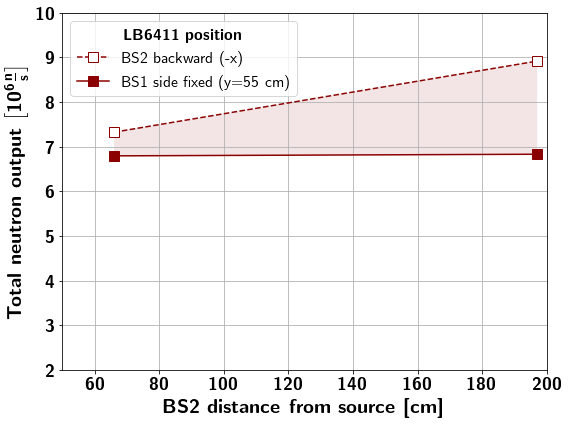

In [13]:
fs = 20
y_scale = 1e6
xlims = [50, 200]
figname = 'BS_mapping_old_target_reversedSpheres_output_BS2_vs_BS1_SOUTH'
if not os.path.exists(outputfolder+'/'+figname):
    os.makedirs(outputfolder+'/'+figname)
# plot neutron output
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']
df_south = df_south.sort_values(['distance'], ascending=True)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
# # x
# minor_locator = AutoMinorLocator(4)
# ax1.xaxis.set_minor_locator(minor_locator)
# # y
# minor_locator = AutoMinorLocator(2)
# ax1.yaxis.set_minor_locator(minor_locator)
# ax1.plot(df_north['distance'], df_north['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 forward (+x)", marker="o", color='darkblue', markerfacecolor='white')
ax1.plot(df_south['distance'], df_south['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 backward (-x)", marker="s", markersize=markersize, color='darkred', markerfacecolor='white')
# ax1.plot(df_east['distance'], df_east['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 East", marker='s', color='darkgreen', markerfacecolor='white')

# ax1.plot(df_north['distance'], df_north['total_neutron_output']/y_scale,  label=r"BS1 side fixed (y=-55 cm)", marker="o", color='darkblue')
ax1.plot(df_south['distance'], df_south['total_neutron_output']/y_scale, label=r"BS1 side fixed (y=55 cm)", marker="s", markersize=markersize, color='darkred')
# ax1.plot(df_east['distance'], df_east['total_neutron_output']/y_scale, label=r"BS1 55 cm West", marker='s', color='darkgreen')
# fig.subplots_adjust(left=0.14)
plt.xlabel(r'\textbf{BS2 distance from source [cm]}', fontsize=fs)
plt.ylabel(r'\textbf{Total neutron output} $\left[10^6 \frac{n}{s} \right]$', fontsize=fs)



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1e7))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
plt.ylim(2, 10)
plt.xlim(xlims)
# ticks
# y_ticks = np.arange(1.0e6, 10e6+1.0e6, 1.0e6)
# y = np.arange(1, 10+1, 1)
# plt.yticks(y_ticks, y)
ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# for tick in ax1.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
# for tick in ax1.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)

# plt.gca().fill_between(df_north['distance'],
#                        df_north['total_neutron_output_from_BS2_cps']/y_scale, df_north['total_neutron_output']/y_scale,
#                        facecolor='darkblue',
#                        alpha=0.1)
plt.gca().fill_between(df_south['distance'],
                       df_south['total_neutron_output_from_BS2_cps']/y_scale, df_south['total_neutron_output']/y_scale,
                       facecolor='darkred',
                       alpha=0.1)
# plt.gca().fill_between(df_east['distance'],
#                        df_east['total_neutron_output_from_BS2_cps']/y_scale, df_east['total_neutron_output']/y_scale,
#                        facecolor='darkgreen',
#                        alpha=0.1)
leg2 = plt.legend(fontsize=fs-4)
leg2.set_title(r"\textbf{LB6411 position}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()
plt.close()

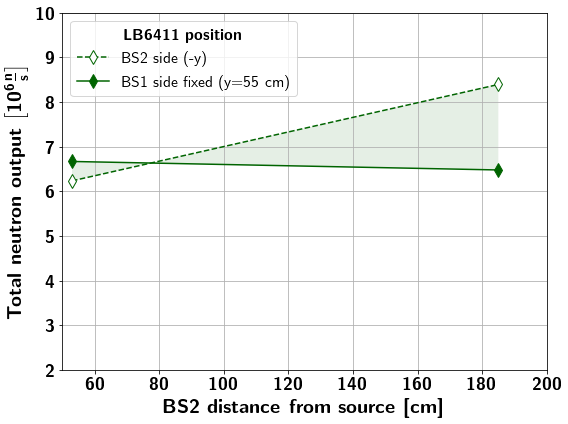

In [14]:
fs = 20
y_scale = 1e6
xlims = [50, 200]
figname = 'BS_mapping_old_target_reversedSpheres_output_BS2_vs_BS1_EAST'
if not os.path.exists(outputfolder+'/'+figname):
    os.makedirs(outputfolder+'/'+figname)
# plot neutron output
df_north = df[ df['direction'] == 'North']
df_south = df[ df['direction'] == 'South']
df_east = df[ df['direction'] == 'East']
df_south = df_south.sort_values(['distance'], ascending=True)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
# # x
# minor_locator = AutoMinorLocator(4)
# ax1.xaxis.set_minor_locator(minor_locator)
# # y
# minor_locator = AutoMinorLocator(2)
# ax1.yaxis.set_minor_locator(minor_locator)
# ax1.plot(df_north['distance'], df_north['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 forward (+x)", marker="o", color='darkblue', markerfacecolor='white')
# ax1.plot(df_south['distance'], df_south['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 backward (-x)", marker="d", color='darkred', markerfacecolor='white')
ax1.plot(df_east['distance'], df_east['total_neutron_output_from_BS2_cps']/y_scale, '--', label=r"BS2 side (-y)", marker='d', markersize=markersize, color='darkgreen', markerfacecolor='white')

# ax1.plot(df_north['distance'], df_north['total_neutron_output']/y_scale,  label=r"BS1 side fixed (y=55 cm)", marker="o", color='darkblue')
# ax1.plot(df_south['distance'], df_south['total_neutron_output']/y_scale, label=r"BS1 side fixed (y=55 cm)", marker="d", color='darkred')
ax1.plot(df_east['distance'], df_east['total_neutron_output']/y_scale, label=r"BS1 side fixed (y=55 cm)", marker='d', markersize=markersize, color='darkgreen')
# fig.subplots_adjust(left=0.14)
plt.xlabel(r'\textbf{BS2 distance from source [cm]}', fontsize=fs)
plt.ylabel(r'\textbf{Total neutron output} $\left[10^6 \frac{n}{s} \right]$', fontsize=fs)



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1e7))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
plt.ylim(2, 10)
plt.xlim(xlims)

# ticks
# y_ticks = np.arange(1.0e6, 10e6+1.0e6, 1.0e6)
# y = np.arange(1, 10+1, 1)
# plt.yticks(y_ticks, y)
ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# for tick in ax1.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
# for tick in ax1.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)

# plt.gca().fill_between(df_north['distance'],
#                        df_north['total_neutron_output_from_BS2_cps']/y_scale, df_north['total_neutron_output']/y_scale,
#                        facecolor='darkblue',
#                        alpha=0.1)
# plt.gca().fill_between(df_south['distance'],
#                        df_south['total_neutron_output_from_BS2_cps']/y_scale, df_south['total_neutron_output']/y_scale,
#                        facecolor='darkred',
#                        alpha=0.1)
plt.gca().fill_between(df_east['distance'],
                       df_east['total_neutron_output_from_BS2_cps']/y_scale, df_east['total_neutron_output']/y_scale,
                       facecolor='darkgreen',
                       alpha=0.1)
leg2 = plt.legend(fontsize=fs-4)
leg2.set_title(r"\textbf{LB6411 position}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()
plt.close()

# Table with the relative differences

- values are in percent

In [15]:
100*np.abs(df['total_neutron_output_from_BS2_cps']-df['total_neutron_output'])/df['total_neutron_output']

run175N    18.356900
run55N      3.328457
run53E      6.517221
run185E    29.551532
run66S      7.794229
run197S    30.536492
dtype: float64

In [16]:
df['total_neutron_output_from_BS2_cps']

run175N    7.869773e+06
run55N     6.119436e+06
run53E     6.233128e+06
run185E    8.391401e+06
run66S     7.322604e+06
run197S    8.914939e+06
Name: total_neutron_output_from_BS2_cps, dtype: float64

In [17]:
df['total_neutron_output']


run175N    6.649188e+06
run55N     6.330131e+06
run53E     6.667675e+06
run185E    6.477269e+06
run66S     6.793132e+06
run197S    6.829461e+06
Name: total_neutron_output, dtype: float64